In [8]:
import pyarrow as pa
import pyarrow.parquet as pq
import fastparquet as fp
import pandas as pd
import os 
file_path = os.path.expanduser("C:/Users/Haelin Park/Downloads/output.parquet")
output = pd.read_parquet(file_path)

ModuleNotFoundError: No module named 'pyarrow'

In [7]:
import numpy as np
import arch
from arch import arch_model

def garch_volatility(df, p=1, q=1):
    """
    Calculates GARCH volatility forecasts for a given DataFrame.
    
    Args:
        df (pandas.DataFrame): A DataFrame containing the time series of volatility.
        p (int): The order of the GARCH model.
        q (int): The order of the ARCH model.
    
    Returns:
        A list of predicted volatilities for the test set.
    """
    volatility = list(df["volatility"])

    train_volatility = volatility[:round(len(volatility)*0.8)]
    test_volatility = volatility[round(len(volatility)*0.8):]
    
    # Fit GARCH(1,1) model to training data
    model = arch_model(train_volatility, p=p, q=q)
    fit_model = model.fit()
    
    # Initialize list for predicted volatilities
    predicted_volatility = []

    # Loop through the test set
    for i in range(len(test_volatility)):
        # Add current test point to training data
        train_volatility = np.append(train_volatility, test_volatility[i])
        
        # Fit GARCH(1,1) model to updated training data
        model = arch_model(train_volatility, p=1, q=1)
        fit_model = model.fit(disp='off')
        
        # Get the last value of the forecasted variance as the forecasted volatility
        forecasted_volatility = np.sqrt(fit_model.forecast(horizon=1).variance.values[-1])
        
        # Append forecasted value to list of predicted volatilities
        predicted_volatility.append(forecasted_volatility)
    
    # Return dataframe with predicted volatilities and corresponding time information
    time_df = df.iloc[round(len(volatility)*0.8):][["time_id", "seconds_in_bucket"]]
    time_df["predicted_volatility"] = predicted_volatility
    
    return time_df


def garch_each_stock(stock):
    # Get a list of unique time ids
    time_ids = stock['time_id'].unique()
    
    # Initialize empty DataFrame to store results
    results_df = pd.DataFrame(columns=["time_id", "seconds_in_bucket", "predicted_volatility"])

    # Loop through the unique time ids
    for time_id in time_ids:

        time_id_rows = stock[stock['time_id'] == time_id]
        
        # Run GARCH model on the time_id rows and append the results to the results DataFrame
        garch_results = garch_volatility(time_id_rows)
        results_df = pd.concat([results_df, garch_results], axis=0)
    
    return results_df


# Test the functions using the sample data frame
df = pd.DataFrame({"time_id":[1, 1, 1,1, 1, 1,1,1,1,1,2,2,2,2,2,2,2],
                    "seconds_in_bucket":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6],
                    "volatility":[5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21]})

garch_each_stock(df)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17.41086638318241
Iteration:      2,   Func. Count:     11,   Neg. LLF: 17.36414100886665
Iteration:      3,   Func. Count:     16,   Neg. LLF: 17.277510183770215
Iteration:      4,   Func. Count:     21,   Neg. LLF: 17.260286351209327
Iteration:      5,   Func. Count:     27,   Neg. LLF: 17.175603996475502
Iteration:      6,   Func. Count:     33,   Neg. LLF: 17.08737540044271
Iteration:      7,   Func. Count:     38,   Neg. LLF: 17.085683206687754
Iteration:      8,   Func. Count:     43,   Neg. LLF: 17.082917484748712
Iteration:      9,   Func. Count:     48,   Neg. LLF: 17.082884426963332
Iteration:     10,   Func. Count:     53,   Neg. LLF: 17.08288304958397
Iteration:     11,   Func. Count:     57,   Neg. LLF: 17.082883073282645
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17.08288304958397
            Iterations: 11
            Function evaluations: 57
            Gradient evaluati

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set r

,time_id,seconds_in_bucket,predicted_volatility
8,1,8,[4.690948496624624]
9,1,9,[5.015749766342585]
16,2,6,[3.5909211031500905]


In [1]:
import numpy as np
import pandas as pd
from arch import arch_model

def garch_volatility(df, p=1, q=1):
    """
    Calculates GARCH volatility forecasts for a given DataFrame.
    
    Args:
        df (pandas.DataFrame): A DataFrame containing the time series of volatility.
        p (int): The order of the GARCH model.
        q (int): The order of the ARCH model.
    
    Returns:
        A list of predicted volatilities for the test set.
    """
    volatility = list(df["volatility"])

    train_volatility = volatility[:round(len(volatility)*0.8)]
    test_volatility = volatility[round(len(volatility)*0.8):]
    
    # Fit GARCH(p,q) model to training data
    model = arch_model(train_volatility, p=p, q=q)
    fit_model = model.fit()
    
    # Initialize list for predicted volatilities
    predicted_volatility = []

    # Loop through the test set
    for i in range(len(test_volatility)):
        # Add current test point to training data
        train_volatility = np.append(train_volatility, test_volatility[i])
        
        # Fit GARCH(p,q) model to updated training data
        model = arch_model(train_volatility, p=p, q=q)
        fit_model = model.fit(disp='off')
        
        # Get the last value of the forecasted variance as the forecasted volatility
        forecasted_volatility = np.sqrt(fit_model.forecast(horizon=1).variance.values[-1])
        
        # Append forecasted value to list of predicted volatilities
        predicted_volatility.append(forecasted_volatility)
    
    return predicted_volatility

def garch_each_stock(stock, p=1, q=1):
    """
    Calculates GARCH volatility forecasts for each stock in a given DataFrame.
    
    Args:
        stock (pandas.DataFrame): A DataFrame containing the stock prices and volatilities.
        p (int): The order of the GARCH model.
        q (int): The order of the ARCH model.
    
    Returns:
        A list of predicted volatilities for all stocks.
    """
    # Get a list of unique time ids
    time_ids = stock['time_id'].unique()
    
    # Loop through the unique time ids
    first = True
    for time_id in time_ids:
        time_id_rows = stock[stock['time_id'] == time_id]

        if first == True:
            ls = garch_volatility(time_id_rows, p=p, q=q)
            first = False
        else:
            ls.extend(garch_volatility(time_id_rows, p=p, q=q))
    
    return ls

# Test the functions using the sample data frame - from Cecilia
df = pd.DataFrame({"time_id":[1, 1, 1,1, 1, 1,1,1,1,1,2,2,2,2,2,2,2],
                    "volatility":[5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21]})

print(garch_each_stock(df, p=1, q=1))


Iteration:      1,   Func. Count:      6,   Neg. LLF: 17.41086638318241
Iteration:      2,   Func. Count:     11,   Neg. LLF: 17.36414100886665
Iteration:      3,   Func. Count:     16,   Neg. LLF: 17.277510183770215
Iteration:      4,   Func. Count:     21,   Neg. LLF: 17.260286351209327
Iteration:      5,   Func. Count:     27,   Neg. LLF: 17.175603996475502
Iteration:      6,   Func. Count:     33,   Neg. LLF: 17.08737540044271
Iteration:      7,   Func. Count:     38,   Neg. LLF: 17.085683206687754
Iteration:      8,   Func. Count:     43,   Neg. LLF: 17.082917484748712
Iteration:      9,   Func. Count:     48,   Neg. LLF: 17.082884426963332
Iteration:     10,   Func. Count:     53,   Neg. LLF: 17.08288304958397
Iteration:     11,   Func. Count:     57,   Neg. LLF: 17.082883073282645
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17.08288304958397
            Iterations: 11
            Function evaluations: 57
            Gradient evaluati

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set r

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from pmdarima.model_selection import train_test_split
from matplotlib import pyplot
import pmdarima

In [3]:
!pip install arch
!pip install pmdarima

^C


In [2]:
stock1 = pd.read_csv('stock_1.csv')
stock1

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1
...,...,...,...,...,...,...,...,...,...,...,...
1507527,32767,588,0.998911,0.999109,0.998812,0.999208,126,42,101,100,1
1507528,32767,589,0.998911,0.999109,0.998812,0.999208,126,126,101,200,1
1507529,32767,591,0.998911,0.999109,0.998812,0.999208,126,226,101,200,1
1507530,32767,592,0.998911,0.999109,0.998812,0.999208,226,225,101,100,1


In [4]:
stock1["WAP"] = (stock1["bid_price1"] * stock1["ask_size1"] + stock1["ask_price1"] * stock1["bid_size1"]) / (stock1["bid_size1"] + stock1["ask_size1"])
stock1

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,WAP
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1,1.000785
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1,1.001032
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1,1.000780
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1,1.001411
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1,1.001115
...,...,...,...,...,...,...,...,...,...,...,...,...
1507527,32767,588,0.998911,0.999109,0.998812,0.999208,126,42,101,100,1,0.999060
1507528,32767,589,0.998911,0.999109,0.998812,0.999208,126,126,101,200,1,0.999010
1507529,32767,591,0.998911,0.999109,0.998812,0.999208,126,226,101,200,1,0.998982
1507530,32767,592,0.998911,0.999109,0.998812,0.999208,226,225,101,100,1,0.999011


In [5]:
log_r1 = []
time_IDs = np.unique(stock1.iloc[:, 0])
for i in range(len(time_IDs)):
    sec = stock1.loc[stock1.iloc[:, 0] == time_IDs[i], 'seconds_in_bucket'].values
    price = stock1.loc[stock1.iloc[:, 0] == time_IDs[i], 'WAP'].values
    log_r = np.log(price[1:] / price[0:(len(price) - 1)])
    log_r1.append(pd.DataFrame({'time': sec[1:], 'log_return': log_r}))
    time_no_change = np.setdiff1d(np.arange(1, 601), log_r1[i]['time'].values)
    if len(time_no_change) > 0:
        new_df = pd.DataFrame({'time': time_no_change, 'log_return': 0})
        log_r1[i] = pd.concat([log_r1[i], new_df])
        log_r1[i] = log_r1[i].sort_values(by='time')
vol = []
def comp_vol(x):
    return np.sqrt(np.sum(x ** 2))
for i in range(len(log_r1)):
    log_r1[i]['time_bucket'] = np.ceil(log_r1[i]['time'] / 30)
    vol.append(log_r1[i].groupby('time_bucket')['log_return'].agg(comp_vol).reset_index())
    vol[i].columns = ['time_bucket', 'volatility']

ans = []
for i in range(len(vol)):
    for j in range(20):
        ans.append(vol[i]["volatility"][j])
y = np.array(ans)
len(y)

76600

In [23]:
train_volatility = y[:round(len(y)*0.8)]
test_volatility = y[round(len(y)*0.8):]

In [22]:
print(len(train_volatility))
print(len(test_volatility))

61281
15320


In [7]:
# Define and fit  the model 
GARCH_model = arch_model(train_volatility, mean = 'Zero', vol='GARCH', p=1, q=1)
model_fit = GARCH_model.fit(disp=0)

# Print model fitting summary
print(model_fit.summary())

# Generate plot 
model_fit.plot()

# Obtain the forecast of the conditional mean and volatility for the test set
forecast = model_fit.forecast(start=len(train_volatility), horizon=len(test_volatility))

# Extract the forecasted volatility for the test set
forecast_var = forecast.variance.values[-1, :]

# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':model_fit.params,
                             'p-value': model_fit.pvalues})

# Print out parameter stats
print(para_summary)

NameError: name 'train_volatility' is not defined

In [14]:
# Forecast the test set
forecast = model_fit.forecast(horizon = len(train_volatility))

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


(array([  3.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   3.,   0.,   1.,
          4.,   2.,   1.,   1.,   6.,  11.,   9.,   5.,  18.,  17.,  25.,
        103.,  27.,  22.,  11.,   3.,   6.,   6.,   0.,   4.,   2.,   3.,
          3.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.12547496, -3.93747817, -3.74948137, -3.56148458, -3.37348779,
        -3.185491  , -2.9974942 , -2.80949741, -2.62150062, -2.43350383,
        -2.24550703, -2.05751024, -1.86951345, -1.68151666, -1.49351986,
        -1.30552307, -1.11752628, -0.92952948, -0.74153269, -0.5535359 ,
        -0.36553911, -0.17754231,  0.01045448,  0.19845127,  0.38644806,
         0.57444486,  0.76244165,  0.95043844,  1.13843524,  1.32643203,
         1.51442882,  1.70242561,  1.89042241,  2.0784192 ,  2.26641599,
         2.45441278,  2.64240958,  2.83040637,  3.01840316,  3.20639995,
         3.39439675,  3.58239354,  3.77039033,  3.95838713,  4.14638392,
 

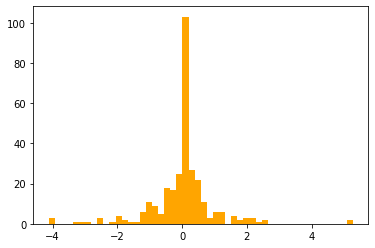

In [22]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardised residuals
gm_std_resid = gm_resid  / gm_std

# Plot the histogram of the standardised residuals 
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'standardized residuals')

Iteration:      1,   Func. Count:      7,   Neg. LLF: -2428.1466880179955
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -2428.146688421002
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1


c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.272e-09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


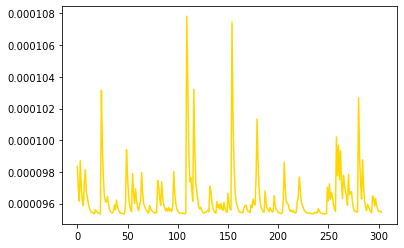

In [72]:
# Fit a GARCH with skewed t-distribution

# Specify GARCH model assumptions
skewt_gm = arch_model(log_r, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')

In [75]:
# GJR-GARCH and EGARCH to model asymmetric respones of volatility! 
# Specify model assumptions - GJR
gjr_gm = arch_model(log_r, p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())

# Specify model assumptions - EGARCH
egarch_gm = arch_model(log_r, p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                2428.16
Distribution:      Standardized Student's t   AIC:                          -4844.32
Method:                  Maximum Likelihood   BIC:                          -4822.02
                                              No. Observations:                  304
Date:                      Sun, Apr 16 2023   Df Residuals:                      303
Time:                              17:58:39   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.272e-09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.272e-09. Parameter
estimation work b

In [85]:
# Compare GJR-GARCH with EGARCH (comparing the estimated conditional volatility from the two models)

# Print the AIC GJR-GARCH
print('AIC of GJR-GARCH model :', gjrgm_result.aic)
# Print the AIC of EGARCH
print('AIC of EGARCH model :', egarch_result.aic)

# Print the BIC GJR-GARCH
print('BIC of GJR-GARCH model :', gjrgm_result.bic)
# Print the BIC of EGARCH
print('BIC of EGARCH model :', egarch_result.bic)


AIC of GJR-GARCH model : -4844.317837555018
AIC of EGARCH model : 2341.896833206788
BIC of GJR-GARCH model : -4822.01567134658
BIC of EGARCH model : 2364.1989994152254


In [45]:
# Calculating MSE and MAE 

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, gm_forecast.mean.iloc[-1])
print("MSE:", mse)

mae = mean_absolute_error(test, gm_forecast.mean.iloc[-1])
print("MAE:", mae)

MSE: 1.6667006335461886e-06
MAE: 0.0009966122695958166


c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


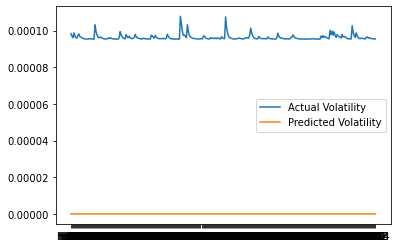

In [52]:
import matplotlib.pyplot as plt

# Get actual volatility
actual_volatility = gm_result.conditional_volatility

# Get predicted volatility
predicted_volatility = gm_result.forecast(horizon=304).variance.iloc[-1]

# Plot actual and predicted volatility
plt.plot(actual_volatility, label='Actual Volatility')
plt.plot(predicted_volatility, label='Predicted Volatility')
plt.legend()
plt.show()

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.905e-09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can u

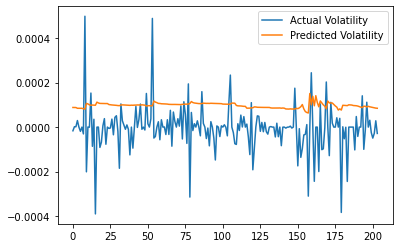

In [26]:
# Set the size of the initial training set
train_size = 100

# Set the size of the forecast horizon (number of periods into the future for which the volatility will be forecasted)
horizon = 1

# Initialize empty lists to store the actual and predicted volatility
actual_vol = []
predicted_vol = []

# Loop through the available data starting from index 'train_size' up to the end,
# increasing the size of the training set at each iteration
for i in range(train_size, len(log_r)):
    
    # Define the current training set
    current_train = log_r[i-train_size:i]
    
    # Define the current test set
    current_test = log_r[i:i+horizon]
    
    # Define the model and fit it on the current training set
    model = arch_model(current_train, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
    result = model.fit(disp='off')
    
    # Generate a forecast for the next period
    forecast = result.forecast(horizon=horizon)
    
    # Extract the forecasted variance for the next period (this is the proxy for the expected volatility in GARCH)
    forecast_var = forecast.variance.values[-1, :]
    
    # Append the actual and predicted volatility to their respective lists
    actual_vol.append(current_test[0])
    predicted_vol.append(np.sqrt(forecast_var[0]))
    
# Plot the actual and predicted volatility
plt.plot(actual_vol, label='Actual Volatility')
plt.plot(predicted_vol, label='Predicted Volatility')
plt.legend()
plt.show()

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.282e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can us

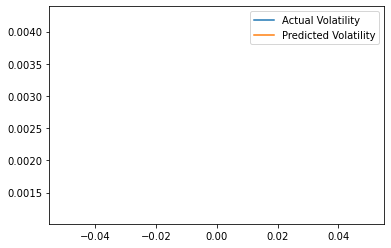

In [25]:
df = pd.DataFrame({"time_id":[1, 1, 1,1, 1, 1,1,1,1,1,2,2,2,2,2,2,2],
                    "volatility":[5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21]})

# Set the size of the initial training set
train_size = round(len(train_volatility)*0.8)
test_size = len(train_volatility) - train_size

# Set the size of the forecast horizon (number of periods into the future for which the volatility will be forecasted)
horizon = 1

# Initialize empty lists to store the actual and predicted volatility
actual_vol = []
predicted_vol = []

# Loop through the available data starting from index 'train_size' up to the end,
# increasing the size of the training set at each iteration
for i in range(train_size, len(train_volatility)):
    
    # Define the current training set
    current_train = train_volatility[i-train_size:i]
    
    # Define the current test set
    current_test = test_volatility[i-train_size:i+horizon]
    
    # Define the model and fit it on the current training set
    model = arch_model(current_train, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
    result = model.fit(disp='off')
    
    # Generate a forecast for the next period
    forecast = result.forecast(horizon=horizon)
    
    # Extract the forecasted variance for the next period (this is the proxy for the expected volatility in GARCH)
    forecast_var = forecast.variance.values[-1, :]
    
    # Append the actual and predicted volatility to their respective lists
    actual_vol.append(current_test[0])
    predicted_vol.append(np.sqrt(forecast_var[0])) 
    break
    
# Plot the actual and predicted volatility
plt.plot(actual_vol, label='Actual Volatility')
plt.plot(predicted_vol, label='Predicted Volatility')
plt.legend()
plt.show()


In [18]:
df = pd.DataFrame({"time_id":[1, 1, 1,1, 1, 1,1,1,1,1,2,2,2,2,2,2,2],
                    "volatility":[5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21]})

# Set the size of the initial training set
train_size = round(len(train_volatility)*0.8)
test_size = len(train_volatility) - train_size

# Set the size of the forecast horizon (number of periods into the future for which the volatility will be forecasted)
horizon = 1

# Initialize empty lists to store the actual and predicted volatility
actual_vol = []
predicted_vol = []

# Loop through the available data starting from index 'train_size' up to the end,
# increasing the size of the training set at each iteration
for i in range(train_size, len(train_volatility)):
    
    # Define the current training set
    current_train = train_volatility[i-train_size:i]
    
    # Define the current test set
    current_test = test_volatility[i-train_size:i+horizon]
    
    # Define the model and fit it on the current training set
    model = arch_model(current_train, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
    result = model.fit(disp='off')
    
    # Generate a forecast for the next period
    forecast = result.forecast(horizon=horizon)
    
    # Extract the forecasted variance for the next period (this is the proxy for the expected volatility in GARCH)
    forecast_var = forecast.variance.values[-1, :]
    
    # Append the actual and predicted volatility to their respective lists
    actual_vol.append(current_test[0])
    predicted_vol.append(np.sqrt(forecast_var[0]))
    
# Plot the actual and predicted volatility
plt.plot(actual_vol, label='Actual Volatility')
plt.plot(predicted_vol, label='Predicted Volatility')
plt.legend()
plt.show()


list

In [1]:
def GARCH_each_stock(stock):
    # Read the CSV file into a pandas DataFrame
    stock = pd.read_csv('stock_1.csv')
    
    log_r1 = []
    time_IDs = np.unique(stock1.iloc[:, 0])
    for i in range(len(time_IDs)):
        sec = stock1.loc[stock1.iloc[:, 0] == time_IDs[i], 'seconds_in_bucket'].values
        price = stock1.loc[stock1.iloc[:, 0] == time_IDs[i], 'WAP'].values
        log_r = np.log(price[1:] / price[0:(len(price) - 1)])
        log_r1.append(pd.DataFrame({'time': sec[1:], 'log_return': log_r}))
        time_no_change = np.setdiff1d(np.arange(1, 601), log_r1[i]['time'].values)
        if len(time_no_change) > 0:
            new_df = pd.DataFrame({'time': time_no_change, 'log_return': 0})
            log_r1[i] = pd.concat([log_r1[i], new_df])
            log_r1[i] = log_r1[i].sort_values(by='time')

    vol = []
    def comp_vol(x):
        return np.sqrt(np.sum(x ** 2))
    for i in range(len(log_r1)):
        log_r1[i]['time_bucket'] = np.ceil(log_r1[i]['time'] / 30)
        vol.append(log_r1[i].groupby('time_bucket')['log_return'].agg(comp_vol).reset_index())
        vol[i].columns = ['time_bucket', 'volatility']

    # Get a list of unique time ids
    time_ids = stock['time_id'].unique()

    all_mse = []
    all_final = []

    # Loop through the unique time ids
    for time_id in time_ids:
        time_id_rows = stock[stock['time_id'] == time_id]
        volatility = vol(time_id_rows, 2)
        ans = GARCH_mse(volatility[0], 5)

        # Define the GARCH model and fit it on the current training set
        model = arch_model(volatility[0], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
        result = model.fit(disp='off')

        # Generate a forecast for the next period
        forecast = result.forecast(horizon=1)
        forecast_var = forecast.variance.values[-1]

        # Append the actual and predicted volatility to their respective lists
        actual_vol = volatility[1][-1]
        predicted_vol = np.sqrt(forecast_var)
        
        all_mse.append((predicted_vol - actual_vol)**2)

        # Create a DataFrame with the final actual and predicted volatility values
        final = pd.DataFrame({
            'Time_ID': [time_id],
            'Seconds': [volatility[1][-1] * 2],
            'Test Volatility': [actual_vol],
            'Predicted Volatility': [predicted_vol]
        })
        all_final.append(final)
        
    # Concatenate all the final DataFrames into a single one and return it
    final_df = pd.concat(all_final)
    mean_mse = np.mean(all_mse)
    
    return final_df, mean_mse


In [22]:
# Calculating MSE and MAE 

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_vol, predicted_vol)
print("MSE:", mse)

mae = mean_absolute_error(actual_vol, predicted_vol)
print("MAE:", mae)

MSE: 0.02273006077151474
MAE: 0.027180045085450417


In [23]:
# Define the range of hyperparameters to test
ps = range(1, 4)
qs = range(1, 4)

# Set the size of the initial training set
train_size = 252

# Set the size of the forecast horizon
horizon = 1

# Initialize empty lists to store the errors for each combination of hyperparameters
mse_list = []
mae_list = []

# Loop through each combination of hyperparameters and calculate the corresponding errors
for p in ps:
    for q in qs:
        mse = []
        mae = []
        for i in range(train_size, len(log_r)):
            # Define the current training set
            current_train = log_r[i-train_size:i]
    
            # Define the current test set
            current_test = log_r[i:i+horizon]
    
            # Define the model and fit it on the current training set
            model = arch_model(current_train, p=p, q=q, mean='constant', vol='GARCH', dist='normal')
            result = model.fit(disp='off')
    
            # Generate a forecast for the next period
            forecast = result.forecast(horizon=horizon)
    
            # Extract the forecasted variance for the next period
            forecast_var = forecast.variance.values[-1, :]
    
            # Calculate the actual and predicted volatility
            actual_vol = current_test[0]
            predicted_vol = np.sqrt(forecast_var[0])
    
            # Append the errors to their respective lists
            mse.append(mean_squared_error([actual_vol], [predicted_vol]))
            mae.append(mean_absolute_error([actual_vol], [predicted_vol]))
    
        # Append the mean errors for the current combination of hyperparameters to their respective lists
        mse_list.append(np.mean(mse))
        mae_list.append(np.mean(mae))
        
# Find the hyperparameters with the lowest mean errors
best_p = ps[np.argmin(mse_list)]
best_q = qs[np.argmin(mse_list)]
print("Best p:", best_p)
print("Best q:", best_q)

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.582e-09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can u

Best p: 1
Best q: 1


c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.576e-09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can u

Ignore - 
# Choosing Bayseian Information Criteria (BIC) as the model selection method and iterating the GARCH model from 1 to 5 lags to select the optimum parameters given the lowest BIC

In [59]:
bic_garch = []
for p in range(1, 5):
    for q in range(1, 5):
        garch = arch_model(train, mean='zero',vol='GARCH', p=p, o=0, q=q)\
                         .fit(disp='off')
        bic_garch.append(garch.bic)
        if garch.bic == np.min(bic_garch):
            best_param = p, q
garch = arch_model(train, mean='zero', vol='GARCH',  p=best_param[0], o=0, q=best_param[1])\
                 .fit(disp='off')
print(garch.summary())

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.915e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.915e-07. Parameter
estimation work be

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                334944.
Distribution:                  Normal   AIC:                          -669883.
Method:            Maximum Likelihood   BIC:                          -669856.
                                        No. Observations:                61280
Date:                Sun, Apr 16 2023   Df Residuals:                    61280
Time:                        16:21:09   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.3630e-08  6.243e-11    538.646      0.000 [3.

c:\Users\Haelin Park\OneDrive\Newfolder\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
